# Calculate river tracer concentrations

Based on the classification system with glacial, continental and other rivers, find trace metal concentrations from river data from Manuel Colombo & Kristina Brown (Colombo et al., 2019)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

Load data from paper:

In [2]:
river_names = ['Akpat Kuunga', 'Glacier', 'Marcil Creek', 'Saaqu', 'Devon Isl.', \
               'Cunningham', 'Garnier', 'Mecham', 'Creswell', 'Le Feuvre Inlet', \
               'Pasley', 'Simpson', 'Ellice', 'Tree']
river_lats = [73.7638, 73.6124, 72.9971, 73.7936, 74.5110, \
              74.0153, 73.9445, 74.6926, 72.8491, 72.3412, \
              70.4696, 67.6763, 67.8930, 67.6242]
river_lons = [-80.4468, -78.6805, -84.9864, -86.9829, -88.4910, -93.6242, -92.0369, -94.7783, -93.4162, \
             -96.9172, -95.5796, -100.5683, -104.0758, -111.9161]
river_spm = [8.31, 261, 3.18, np.nan, np.nan, \
             0.85, 13.6, 0.14, 2.43, np.nan, \
             0.03, 19.1, 4.82, np.nan]
river_dpb = [(1.53+3.20)/2, 35, (3.23+5.22)/2, (1.01+1.26)/2, 1.74, (0.601+0.670)/2, \
            3.53, 1.49, (4.48+6.07)/2, (1.59+1.78)/2, 1.72, (32+73)/2, \
            (60+64)/2, (12+15)/2]

# Salinity (PSS78): 0.06, 0.02, 0.03, 0.10, 0.07, 0.11, 0.13, 0.14, 0.16, 0.19, 0.11, 0.09, 0.04, 0.05


### Groupings:

- Glacial rivers: Glacial River
- Continental rivers: Tree River, Ellice River, Simpson River
- Other rivers: Marcil, Saaqu, Devon Island, Cunningham, Garnier, Mecham, Creswell, Le Feuvre Inlet, Pasle, Akput Kuunga

In [3]:
spm_glaciers = river_spm[1]
spm_other    = np.append(river_spm[2:11], river_spm[0])
spm_cont     = river_spm[11:14]

dPb_glaciers = river_dpb[1]
dPb_other    = np.append(river_dpb[2:11], river_dpb[0])
dPb_cont     = river_dpb[11:14]

In [7]:
print(f'dPb, glaciers: {np.average(dPb_glaciers):.2f}')
print(f'dPb, continental: {np.average(dPb_cont):.2f}')
print(f'dPb, other: {np.average(dPb_other):.2f}')
print('---------------------------------')
print(f'spm, glaciers: {np.nanmean(spm_glaciers):.2f}')
print(f'spm, continental: {np.nanmean(spm_cont):.2f}')
print(f'spm, other: {np.nanmean(spm_other):.2f}')

dPb, glaciers: 35.00
dPb, continental: 42.67
dPb, other: 2.38
---------------------------------
spm, glaciers: 261.00
spm, continental: 11.96
spm, other: 4.08


Average dissolved concentrations:

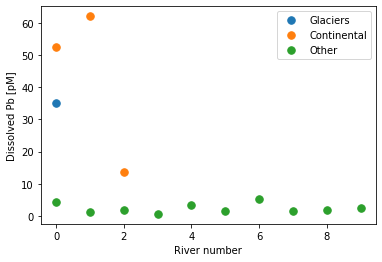

In [5]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(dPb_glaciers, '.', markersize=15, label='Glaciers')
ax.plot(dPb_cont,     '.', markersize=15, label='Continental')
ax.plot(dPb_other,    '.', markersize=15, label='Other')

# ax.set_ylim(0,100)
ax.set_ylabel('Dissolved Pb [pM]')
ax.set_xlabel('River number')
ax.legend()

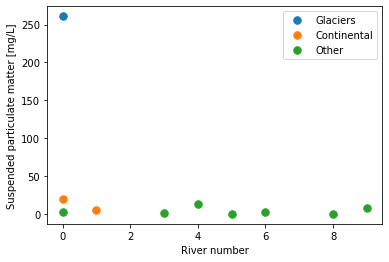

In [6]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(spm_glaciers, '.', markersize=15, label='Glaciers')
ax.plot(spm_cont,     '.', markersize=15, label='Continental')
ax.plot(spm_other,    '.', markersize=15, label='Other')

# ax.set_ylim(0,100)
ax.set_ylabel('Suspended particulate matter [mg/L]')
ax.set_xlabel('River number')
ax.legend()